In [317]:
%matplotlib inline

In [318]:
import numpy as np
import random as py_random
import numpy.random as np_random
import time
import matplotlib.pyplot as plt
import matplotlib
from __future__ import division
import pandas as pd
from  sklearn.neighbors import KNeighborsClassifier
from  sklearn.neighbors import KNeighborsRegressor
from sklearn.cross_validation import KFold
from sklearn.cluster import KMeans
import patsy
import sklearn.linear_model as linear

# Module 10 Lab - Distance Based Machine Learning

## Directions

1. Show all work/steps/calculations. If it is easier to write it out by hand, do so and submit a scanned PDF in addition to this notebook. Otherwise, generate a Markdown cell for each answer.
2. You must submit to **two** places by the deadline:
    1. In the Lab section of the Course Module where you downloaded this file from, and
    2. In your Lab Discussion Group, in the forum for the appropriate Module.
3. You may use any core Python libraries or Numpy/Scipy. **Additionally, code from the Module notebooks and lectures is fair to use and modify.** You may also consult Stackoverflow (SO). If you use something from SO, please place a comment with the URL to document the code.

We're getting to the point in the semester where you should be know the drill. Our goal is to understand our tools very well by generating data we think the tool would work with and data we think wouldn't work.

This module covered 3 basic problems: supervised learning (classification, regression), unsupervised learning (clustering) and recommenders (collaborative filtering based systems related to missing value imputation) using distance/similarity. We're only going to cover the first 2 in this lab.

You should definitely use [Scikit Learn](http://scikit-learn.org/stable/) and refer to the documentation for this assignment.

Remember to create a new random seed for each experiment and save it.

**Problem 1. Classification**

Use k-Nearest Neighbors for a classification problems of your own creation (you can use data from previous labs that had classification problems as a start). You should explore the following points:

1. Is the boundary between the classes very distinct or fuzzy? What if it's a mixture (distinct for some variable and fuzzy for another)?
2. What happens if you vary the "shape" of the classes? (Not just perfect circles but interlocking "moons" or other shapes).
3. How do you pick a value for k?
4. Compare with logistic regression.

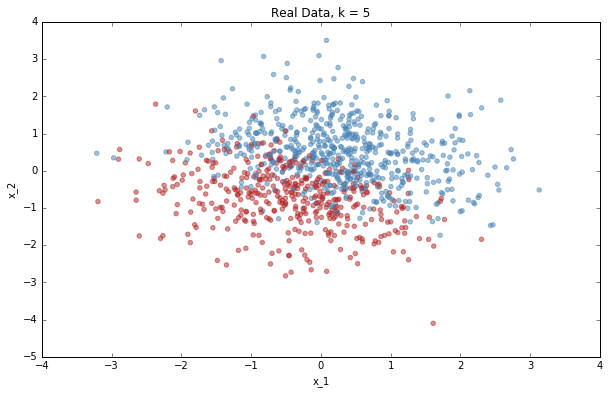

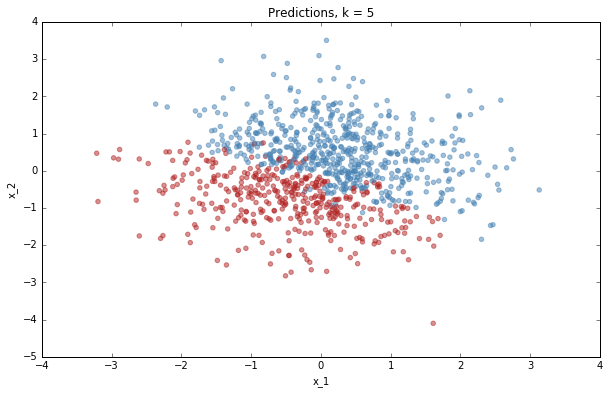

In [319]:
# Create data
py_random.seed(314)
np_random.seed(314)
x_1 = np.random.normal(0, 1, 1000)
x_2 = np.random.normal(0, 1, 1000)
z = 1 + 2 * x_1 + 3 * x_2
pr = 1/(1+np.exp(-z))
y = [1 if py_random.random() < p else 0 for p in pr]
colors = []
for val in y:
    if val == 1:
        colors.append('steelblue')
    else:
        colors.append('firebrick')
        
# Graph the data
figure = plt.figure(figsize=(10,6))
axes = figure.add_subplot(1, 1, 1)
axes.scatter(x_1, x_2, alpha=0.5, color=colors)
axes.set_xlabel("x_1")
axes.set_ylabel("x_2")
axes.set_title("Real Data, k = 5")

# Format data
instances = np.column_stack((x_1, x_2, y))

# Train the kNN model
model = KNeighborsClassifier()
model.fit(instances[:, :-1], instances[:, -1])
predictions = model.predict(instances[:, :-1])

# Graph predictions
colors = []
for val in predictions:
    if val == 1:
        colors.append('steelblue')
    else:
        colors.append('firebrick')
figure = plt.figure(figsize=(10,6))
axes = figure.add_subplot(1, 1, 1)
axes.scatter(x_1, x_2, alpha=0.5, color=colors)
axes.set_xlabel("x_1")
axes.set_ylabel("x_2")
axes.set_title("Predictions, k = 5")

The above decision boundary is relatively distinct and is based on how distinct the actual decision boundary is. Making that decision boundary in the original data fuzzy, we get:

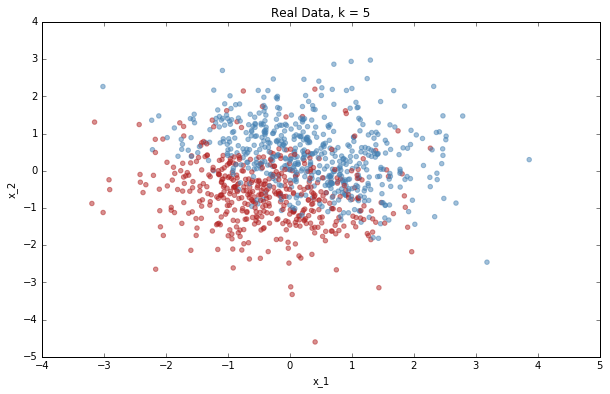

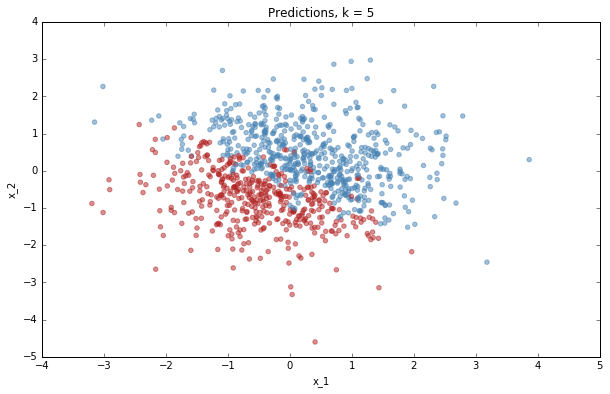

In [320]:
# Create data
py_random.seed(3014)
np_random.seed(3014)
x_1 = np.random.normal(0, 1, 1000)
x_2 = np.random.normal(0, 1, 1000)
z = 1 + 2 * x_1 + 3 * x_2
pr = 1/(1+np.exp(-z))
y = [1 if py_random.random() < p and np.random.uniform(0, 1) < 0.92 else 0 for p in pr]
colors = []
for val in y:
    if val == 1:
        colors.append('steelblue')
    else:
        colors.append('firebrick')
        
# Graph the data
figure = plt.figure(figsize=(10,6))
axes = figure.add_subplot(1, 1, 1)
axes.scatter(x_1, x_2, alpha=0.5, color=colors)
axes.set_xlabel("x_1")
axes.set_ylabel("x_2")
axes.set_title("Real Data, k = 5")

# Format data
instances = np.column_stack((x_1, x_2, y))

# Train the kNN model
model = KNeighborsClassifier()
model.fit(instances[:, :-1], instances[:, -1])
predictions = model.predict(instances[:, :-1])

# Graph predictions
colors = []
for val in predictions:
    if val == 1:
        colors.append('steelblue')
    else:
        colors.append('firebrick')
figure = plt.figure(figsize=(10,6))
axes = figure.add_subplot(1, 1, 1)
axes.scatter(x_1, x_2, alpha=0.5, color=colors)
axes.set_xlabel("x_1")
axes.set_ylabel("x_2")
axes.set_title("Predictions, k = 5")

With the fuzzier decision boundary in the original data, the predicted decision boundary only gets slightly more fuzzy. The fuzziness of the decision boundary is probably mostly influenced by the number of nearest neighbors considered, not neccesarily the original decision boundary.

Next, let's change the shape of the classes to be moon-like.

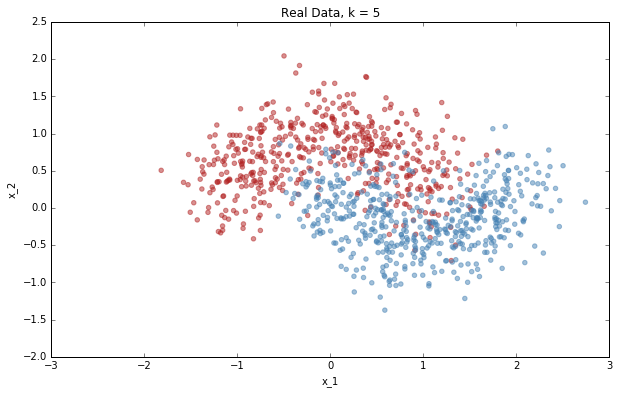

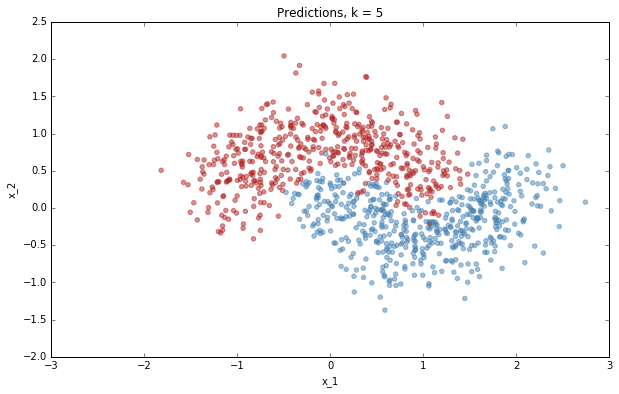

In [321]:
# Create data
py_random.seed(3140)
np_random.seed(3140)
# Make moon shaped clusters
outer_moon_x1 = np.cos(np.linspace(0, np.pi, 500))
outer_moon_x2 = np.sin(np.linspace(0, np.pi, 500))
inner_moon_x1 = 1 - np.cos(np.linspace(0, np.pi, 500))
inner_moon_x2 = 1 - np.sin(np.linspace(0, np.pi, 500)) - .5
instances = np.vstack((np.append(outer_moon_x1, inner_moon_x1), np.append(outer_moon_x2, inner_moon_x2))).T
instances[:, 0] += np.random.normal(0, 0.3, 1000)
instances[:, 1] += np.random.normal(0, 0.3, 1000)
labels = [0 if i < 500 else 1 for i in xrange(1000)]
colors = []
for val in labels:
    if val == 1:
        colors.append('steelblue')
    else:
        colors.append('firebrick')
        
# Graph the data
figure = plt.figure(figsize=(10,6))
axes = figure.add_subplot(1, 1, 1)
axes.scatter(instances[:, 0], instances[:, 1], alpha=0.5, color=colors)
axes.set_xlabel("x_1")
axes.set_ylabel("x_2")
axes.set_title("Real Data, k = 5")

# Train the kNN model
model = KNeighborsClassifier()
model.fit(instances, labels)
predictions = model.predict(instances)

# Graph predictions
colors = []
for val in predictions:
    if val == 1:
        colors.append('steelblue')
    else:
        colors.append('firebrick')
figure = plt.figure(figsize=(10,6))
axes = figure.add_subplot(1, 1, 1)
axes.scatter(instances[:, 0], instances[:, 1], alpha=0.5, color=colors)
axes.set_xlabel("x_1")
axes.set_ylabel("x_2")
axes.set_title("Predictions, k = 5")

In this experiment, the predicted decision boundary largely matches the original decision boundary but it still tries to make a 'smooth' prediction, meaning there are less outliers with the predicted boundary. It doesn't seem that changing the class shapes to half moons had a negative effect on kNN's ability to learn the correct boundary.

Turning our attention to the 'k' in kNN, we can use 10-fold cross validation to find the optimum k:

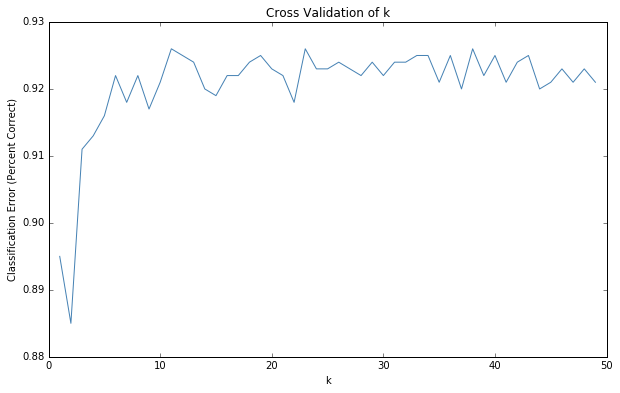

In [322]:
# Create data
py_random.seed(31400)
np_random.seed(31400)
# Make moon shaped clusters
outer_moon_x1 = np.cos(np.linspace(0, np.pi, 500))
outer_moon_x2 = np.sin(np.linspace(0, np.pi, 500))
inner_moon_x1 = 1 - np.cos(np.linspace(0, np.pi, 500))
inner_moon_x2 = 1 - np.sin(np.linspace(0, np.pi, 500)) - .5
instances = np.vstack((np.append(outer_moon_x1, inner_moon_x1), np.append(outer_moon_x2, inner_moon_x2))).T
instances[:, 0] += np.random.normal(0, 0.3, 1000)
instances[:, 1] += np.random.normal(0, 0.3, 1000)
labels = [0 if i < 500 else 1 for i in xrange(1000)]
colors = []
for val in labels:
    if val == 1:
        colors.append('steelblue')
    else:
        colors.append('firebrick')
instances = np.column_stack((instances, labels))
        
# Run 3 rounds of 10-fold cross validation
errors = []
for k in xrange(1, 50):
    generalization_error = []
    np.random.shuffle(instances)
    kf = KFold(1000, n_folds=10)
    for train, test in kf:
        # Learn linear regression model
        model = KNeighborsClassifier(n_neighbors=k)
        model.fit(instances[train, :-1], instances[train, -1])
        predictions = model.predict(instances[test, :-1])
        # Calculate number of correct predictions
        error = sum(predictions == instances[test, -1]) / len(predictions)
        generalization_error.append(error)
    errors.append(np.mean(generalization_error))

figure = plt.figure(figsize=(10,6))
axes = figure.add_subplot(1, 1, 1)
axes.plot([i for i in xrange(1, 50)], errors, color='steelblue')
axes.set_xlabel("k")
axes.set_ylabel("Classification Error (Percent Correct)")
axes.set_title("Cross Validation of k")

This cross-validation experiment shows us that for the half-moon data, k = 11 is where we obtain optimum performance, predicting 92% of the classes correctly. This same procedure can be followed to tune the k for any data set.

Since the half moon data set is more interesting to me than my original data set, I'll use it to make a comparison of kNN to logistic regression. For this comparsion, I'll run 10-fold cross validation on the half moon data sets using both algorithms. 

First, kNN with k = 11:

In [323]:
# Create data
py_random.seed(314000)
np_random.seed(314000)
# Make moon shaped clusters
outer_moon_x1 = np.cos(np.linspace(0, np.pi, 500))
outer_moon_x2 = np.sin(np.linspace(0, np.pi, 500))
inner_moon_x1 = 1 - np.cos(np.linspace(0, np.pi, 500))
inner_moon_x2 = 1 - np.sin(np.linspace(0, np.pi, 500)) - .5
instances = np.vstack((np.append(outer_moon_x1, inner_moon_x1), np.append(outer_moon_x2, inner_moon_x2))).T
instances[:, 0] += np.random.normal(0, 0.3, 1000)
instances[:, 1] += np.random.normal(0, 0.3, 1000)
labels = [0 if i < 500 else 1 for i in xrange(1000)]
colors = []
for val in labels:
    if val == 1:
        colors.append('steelblue')
    else:
        colors.append('firebrick')
instances = np.column_stack((instances, labels))
        
# Run 3 rounds of 10-fold cross validation
errors = []
for rd in xrange(3):
    generalization_error = []
    np.random.shuffle(instances)
    kf = KFold(1000, n_folds=10)
    for train, test in kf:
        # Learn linear regression model
        model = KNeighborsClassifier(n_neighbors=32)
        model.fit(instances[train, :-1], instances[train, -1])
        predictions = model.predict(instances[test, :-1])
        # Calculate number of correct predictions
        error = sum(predictions == instances[test, -1]) / len(predictions)
        generalization_error.append(error)
    errors.append(np.mean(generalization_error))

print "kNN with k = 11 cross-validation error: %f%%" % (np.mean(errors) * 100)

kNN with k = 11 cross-validation error: 92.233333%


Next we can run cross-validation for logistic regression:

In [324]:
# Run 3 rounds of 10-fold cross validation
errors = []
for rd in xrange(3):
    generalization_error = []
    np.random.shuffle(instances)
    kf = KFold(1000, n_folds=10)
    for train, test in kf:
        # Learn linear regression model
        model = linear.LogisticRegression(fit_intercept=False).fit(instances[train, :-1], instances[train, -1])
        predictions = model.predict(instances[test, :-1])
        # Calculate number of correct predictions
        error = sum(predictions == instances[test, -1]) / len(predictions)
        generalization_error.append(error)
    errors.append(np.mean(generalization_error))

print "Logistic regression cross-validation error: %f%%" % (np.mean(errors) * 100)

Logistic regression cross-validation error: 85.200000%


As can been, kNN slightly outperforms logistic regression with respect to the half-moon data set by 7%. Its important to note, due to the no free lunch theorem, this result doesn't mean kNN will always outperform logistic regression.

**Problem 2. Regression**

Use k-Nearest Neighbors for regression problems of your own creation (you can use data from previous labs that had regression problems as a start). You should explore the following points, especially in comparison to Linear Regression.

1. What if the function is very linear? What if the function is very non-linear?
2. What if the data is very disperse? (try different $\epsilon$).
2. Other than mean centering or some other normalization, do we need transformations of the $X_i$ variables for kNN regression?

First let's ask kNN to estimate a linear function of the form y = 2.3 + 32.5 * x + noise where noise is normally distributed with mean of 0 and standard deviation of 100.

In [325]:
# Create data
py_random.seed(31000)
np_random.seed(31000)
x = np.array([i for i in xrange(0, 1000)])
noise = np.random.normal(0, 100, 1000)
y = 2.3 + 32.5 * x + noise
instances = np.column_stack((x, noise, y))

# Run 3 rounds of 10-fold cross validation
errors = []
for rd in xrange(3):
    generalization_error = []
    np.random.shuffle(instances)
    kf = KFold(1000, n_folds=10)
    for train, test in kf:
        # Learn linear regression model
        model = KNeighborsRegressor().fit(instances[train, :-1], instances[train, -1])
        predictions = model.predict(instances[test, :-1])
        # Calculate MSE
        error = sum(predictions - instances[test, -1])**2
        generalization_error.append(error)
    errors.append(np.mean(generalization_error))

print "kNN cross-validation MSE: %f" % np.mean(errors)

kNN cross-validation MSE: 3829940.786478


To compare, in a relative sense, let's use on a non-linear such as y = 2.5 + 32.5 * sin(x) + noise where noise is normally distributed with mean of 0 and standard deviation of 100.

In [326]:
# Create data
py_random.seed(34000)
np_random.seed(34000)
x = np.array([i for i in xrange(0, 1000)])
noise = np.random.normal(0, 100, 1000)
y = 2.3 + 32.5 * np.sin(x) + noise
instances = np.column_stack((x, noise, y))

# Run 3 rounds of 10-fold cross validation
errors = []
for rd in xrange(3):
    generalization_error = []
    np.random.shuffle(instances)
    kf = KFold(1000, n_folds=10)
    for train, test in kf:
        # Learn linear regression model
        model = KNeighborsRegressor().fit(instances[train, :-1], instances[train, -1])
        predictions = model.predict(instances[test, :-1])
        # Calculate MSE
        error = sum(predictions - instances[test, -1])**2
        generalization_error.append(error)
    errors.append(np.mean(generalization_error))

print "kNN cross-validation MSE: %f" % np.mean(errors)

kNN cross-validation MSE: 82481.876941


Although these experiments 'compare' kNN on linear and non-linear data sets, they can't be compared directly since they both operate on different data. With that being said, kNN does a good job of predicting the non-linear relationship of the sine wave. One way to explain this is that kNN's estimation is globally non-linear in that it can fit linear curves to the k nearest neighbors of a query point but the characteristics of each curve for each query point has the freedom to change drastically.

In the next couple of experiments, let's look at the effect of noise on kNN regression. Using the equation above, let's vary the standard deviation of the noise from 500 to 1000. We will run 100 rounds of 10-fold cross validation for each.

kNN with noise of 500, cross-validation MSE: 139048.142880


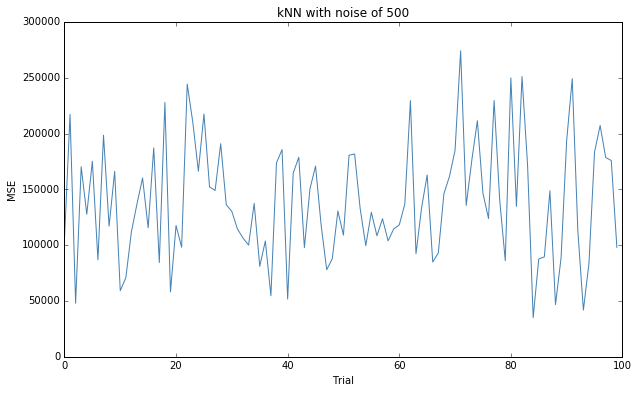

In [327]:
# Create data
py_random.seed(14000)
np_random.seed(14000)
x = np.array([i for i in xrange(0, 1000)])
noise = np.random.normal(0, 500, 1000)
y = 2.3 + 32.5 * np.sin(x) + noise
instances = np.column_stack((x, noise, y))

# Run 3 rounds of 10-fold cross validation
errors = []
for rd in xrange(100):
    generalization_error = []
    np.random.shuffle(instances)
    kf = KFold(1000, n_folds=10)
    for train, test in kf:
        # Learn linear regression model
        model = KNeighborsRegressor().fit(instances[train, :-1], instances[train, -1])
        predictions = model.predict(instances[test, :-1])
        # Calculate MSE
        error = sum(predictions - instances[test, -1])**2
        generalization_error.append(error)
    errors.append(np.mean(generalization_error))

figure = plt.figure(figsize=(10,6))
axes = figure.add_subplot(1, 1, 1)
axes.plot([i for i in xrange(100)], errors, color='steelblue')
axes.set_xlabel("Trial")
axes.set_ylabel("MSE")
axes.set_title("kNN with noise of 500")
print "kNN with noise of 500, cross-validation MSE: %f" % np.mean(errors)

kNN with noise of 1000 cross-validation MSE: 219381.652056


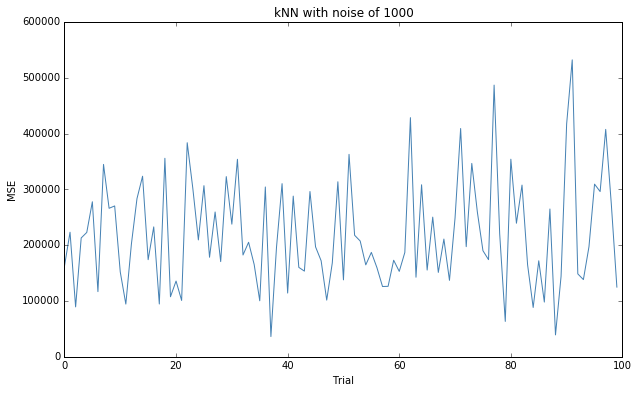

In [328]:
# Create data
py_random.seed(14000)
np_random.seed(14000)
x = np.array([i for i in xrange(0, 1000)])
noise = np.random.normal(0, 1000, 1000)
y = 2.3 + 32.5 * np.sin(x) + noise
instances = np.column_stack((x, noise, y))

# Run 3 rounds of 10-fold cross validation
errors = []
for rd in xrange(100):
    generalization_error = []
    np.random.shuffle(instances)
    kf = KFold(1000, n_folds=10)
    for train, test in kf:
        # Learn linear regression model
        model = KNeighborsRegressor().fit(instances[train, :-1], instances[train, -1])
        predictions = model.predict(instances[test, :-1])
        # Calculate MSE
        error = sum(predictions - instances[test, -1])**2
        generalization_error.append(error)
    errors.append(np.mean(generalization_error))
figure = plt.figure(figsize=(10,6))
axes = figure.add_subplot(1, 1, 1)
axes.plot([i for i in xrange(100)], errors, color='steelblue')
axes.set_xlabel("Trial")
axes.set_ylabel("MSE")
axes.set_title("kNN with noise of 1000")
print "kNN with noise of 1000 cross-validation MSE: %f" % np.mean(errors)

Although it is challenging to directly comparison the two experiments because of the variability they exhibit between runs, it appears the more noise increases kNN's MSE but not by much. This makes sense since kNN doesn't inherently deal with outliers.

** Problem 3. Clustering **

Use k-Means Clustering on clustering problems of your own creation. You should explore the following points: 

1. What if the data has no clusters (there are no hidden categorical variables)?
2. Now assume that you have some "hidden" categorical variable and the clusters are compact and distinct as well as having the same variance? What does the Elbow Method show for the k you should use?
3. Now assume that you have some "hidden" categorical variable and the clusters are disperse? Different variances? What does the Elbow Method show for the k you should use?

First, let's consider data that has no clusters. We set k in k-means to the number of classes, here 2. We use 3 rounds of 10-fold cross validation 

Classification error via cross validation: 50.366667%


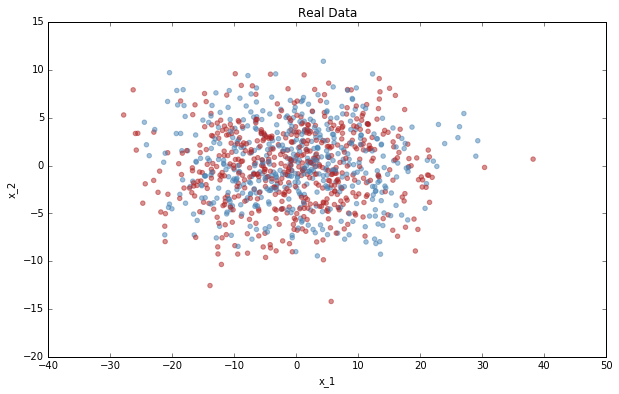

In [329]:
py_random.seed(315000)
np_random.seed(315000)
x_1 = np.random.normal(0, 10, 1000)
x_2 = np.random.normal(0, 4, 1000)
labels = np.random.randint(0, 2, 1000)
colors = []
for label in labels:
    if label == 1:
        colors.append('steelblue')
    else:
        colors.append('firebrick')
        
# Graph the original data
figure = plt.figure(figsize=(10,6))
axes = figure.add_subplot(1, 1, 1)
axes.scatter(x_1, x_2, alpha=0.5, color=colors)
axes.set_xlabel("x_1")
axes.set_ylabel("x_2")
axes.set_title("Real Data")

# 3 rounds of 10 fold cross validation
instances = np.column_stack((x_1, x_2, labels))
errors = []
for rd in xrange(3):
    generalization_error = []
    np.random.shuffle(instances)
    kf = KFold(1000, n_folds=10)
    for train, test in kf:
        # Learn kmeans model
        model = KMeans(n_clusters=2).fit(instances[train, :-1], instances[train, -1])
        predictions = model.predict(instances[test, :-1])
        # Calculate number of correct predictions
        error = sum(predictions == instances[test, -1]) / len(predictions)
        generalization_error.append(error)
    errors.append(np.mean(generalization_error))
print "Classification error via cross validation: %f%%" % (np.mean(errors) * 100)

Here, we see that the prediction accuracy of KMeans on data without clusters is poor. In fact, if we assumed the 2 classes are both equally likely to occur, in the case where KMeans generalization performance is 49%, we'd be better off randomly flipping a fair coin.

Next, let's look at a data set that is has more uniform clusters in it.

Classification error via cross validation: 16.120000%


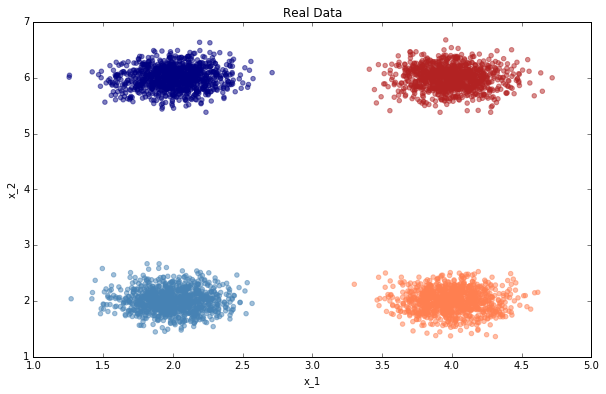

In [330]:
# Create data with 4 clusters
py_random.seed(316000)
np_random.seed(316000)
centers_x1 = [1, 2, 1, 2]
centers_x2 = [1, 1, 3, 3]
x_1 = []
x_2 = []
cluster = 1
colors = []
labels = []
for center_x1, center_x2 in zip(centers_x1, centers_x2):
    x_1.extend(center_x1 + np.random.normal(center_x1, 0.2, 1000))
    x_2.extend(center_x2 + np.random.normal(center_x2, 0.2, 1000))
    if cluster == 1:
        colors.extend(['steelblue'] * 1000)
        labels.extend([1] * 1000)
    elif cluster == 2:
        colors.extend(['coral'] * 1000)
        labels.extend([2] * 1000)
    elif cluster == 3:
        colors.extend(['navy'] * 1000)
        labels.extend([3] * 1000)
    else:
        colors.extend(['firebrick'] * 1000)
        labels.extend([4] * 1000)
    cluster += 1
x_1 = np.array(x_1)
x_2 = np.array(x_2)
labels = np.array(labels)

# Graph the original data
figure = plt.figure(figsize=(10,6))
axes = figure.add_subplot(1, 1, 1)
axes.scatter(x_1, x_2, alpha=0.5, color=colors)
axes.set_xlabel("x_1")
axes.set_ylabel("x_2")
axes.set_title("Real Data")

# 3 rounds of 10 fold cross validation
instances = np.column_stack((x_1.T, x_2.T, labels.T))
errors = []
for rd in xrange(10):
    generalization_error = []
    np.random.shuffle(instances)
    kf = KFold(1000, n_folds=10)
    for train, test in kf:
        # Learn kmeans model
        model = KMeans(n_clusters=4).fit(instances[train, :-1], instances[train, -1])
        predictions = model.predict(instances[test, :-1])
        # Calculate number of correct predictions
        error = sum(predictions == instances[test, -1]) / len(predictions)
        generalization_error.append(error)
    errors.append(np.mean(generalization_error))
print "Classification error via cross validation: %f%%" % (np.mean(errors) * 100)

In the above experiment, 10-fold cross validation was used to determine KMeans performance on 4 clusters that were clearly separated and spaced out from each other. Performance wasn't great, normally sub 25%. At that rate, if we assume the classes are all equally likely to occur we may be better off uniformly picking the same class label each time. In theory, this should give us the same 25% accuracy.

Tweaking the experiment a little, let's try a case when the clusters aren't so separated.

Classification error via cross validation: 19.140000%


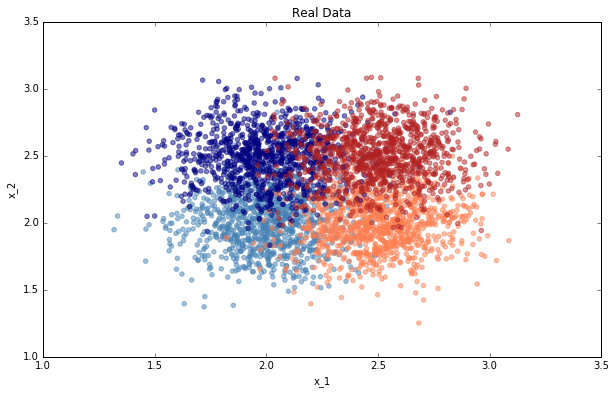

In [331]:
# Create data with 4 clusters
py_random.seed(317000)
np_random.seed(317000)
centers_x1 = [1, 1.25, 1, 1.25]
centers_x2 = [1, 1, 1.25, 1.25]
x_1 = []
x_2 = []
cluster = 1
colors = []
labels = []
for center_x1, center_x2 in zip(centers_x1, centers_x2):
    x_1.extend(center_x1 + np.random.normal(center_x1, 0.2, 1000))
    x_2.extend(center_x2 + np.random.normal(center_x2, 0.2, 1000))
    if cluster == 1:
        colors.extend(['steelblue'] * 1000)
        labels.extend([1] * 1000)
    elif cluster == 2:
        colors.extend(['coral'] * 1000)
        labels.extend([2] * 1000)
    elif cluster == 3:
        colors.extend(['navy'] * 1000)
        labels.extend([3] * 1000)
    else:
        colors.extend(['firebrick'] * 1000)
        labels.extend([4] * 1000)
    cluster += 1
x_1 = np.array(x_1)
x_2 = np.array(x_2)
labels = np.array(labels)
        
# Graph the original data
figure = plt.figure(figsize=(10,6))
axes = figure.add_subplot(1, 1, 1)
axes.scatter(x_1, x_2, alpha=0.5, color=colors)
axes.set_xlabel("x_1")
axes.set_ylabel("x_2")
axes.set_title("Real Data")

# 3 rounds of 10 fold cross validation
instances = np.column_stack((x_1.T, x_2.T, labels.T))
errors = []
for rd in xrange(10):
    generalization_error = []
    np.random.shuffle(instances)
    kf = KFold(1000, n_folds=10)
    for train, test in kf:
        # Learn kmeans model
        model = KMeans(n_clusters=4).fit(instances[train, :-1], instances[train, -1])
        predictions = model.predict(instances[test, :-1])
        # Calculate number of correct predictions
        error = sum(predictions == instances[test, -1]) / len(predictions)
        generalization_error.append(error)
    errors.append(np.mean(generalization_error))
print "Classification error via cross validation: %f%%" % (np.mean(errors) * 100)

Surprisely, KMeans appears to do slightly better in this experiment. The obvious differences between experiments are the distance between clusters is smaller in the second experiment and the clusters are less dense. A few things that might account for this difference is how well the initial cluster centroids are calculated and the maximum number of iterations run on a single pass through the KMeans algorithm. To test things, let's try improving performance on the experiment with 4 dense, separated clusters. Let's first try increasing the number of max iterations:

Classification error via cross validation: 16.120000%


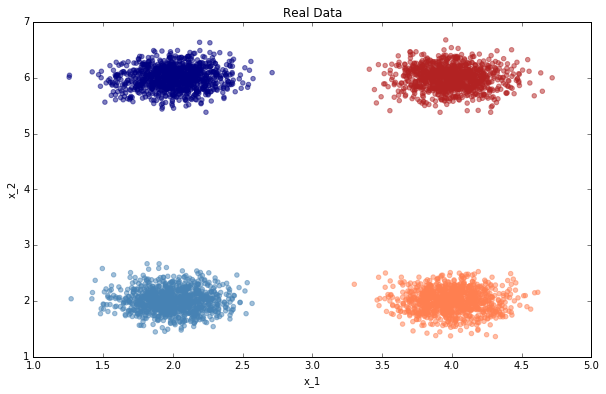

In [332]:
# Create data with 4 clusters
py_random.seed(316000)
np_random.seed(316000)
centers_x1 = [1, 2, 1, 2]
centers_x2 = [1, 1, 3, 3]
x_1 = []
x_2 = []
cluster = 1
colors = []
labels = []
for center_x1, center_x2 in zip(centers_x1, centers_x2):
    x_1.extend(center_x1 + np.random.normal(center_x1, 0.2, 1000))
    x_2.extend(center_x2 + np.random.normal(center_x2, 0.2, 1000))
    if cluster == 1:
        colors.extend(['steelblue'] * 1000)
        labels.extend([1] * 1000)
    elif cluster == 2:
        colors.extend(['coral'] * 1000)
        labels.extend([2] * 1000)
    elif cluster == 3:
        colors.extend(['navy'] * 1000)
        labels.extend([3] * 1000)
    else:
        colors.extend(['firebrick'] * 1000)
        labels.extend([4] * 1000)
    cluster += 1
x_1 = np.array(x_1)
x_2 = np.array(x_2)
labels = np.array(labels)

# Graph the original data
figure = plt.figure(figsize=(10,6))
axes = figure.add_subplot(1, 1, 1)
axes.scatter(x_1, x_2, alpha=0.5, color=colors)
axes.set_xlabel("x_1")
axes.set_ylabel("x_2")
axes.set_title("Real Data")

# 3 rounds of 10 fold cross validation
instances = np.column_stack((x_1.T, x_2.T, labels.T))
errors = []
for rd in xrange(10):
    generalization_error = []
    np.random.shuffle(instances)
    kf = KFold(1000, n_folds=10)
    for train, test in kf:
        # Learn kmeans model
        model = KMeans(n_clusters=4, max_iter=1000).fit(instances[train, :-1], instances[train, -1])
        predictions = model.predict(instances[test, :-1])
        # Calculate number of correct predictions
        error = sum(predictions == instances[test, -1]) / len(predictions)
        generalization_error.append(error)
    errors.append(np.mean(generalization_error))
print "Classification error via cross validation: %f%%" % (np.mean(errors) * 100)

Increasing the max iterations from 300 to 1000 didn't change the accuracy of the original KMeans model. Next let's try initializing our cluster centroids to 4 random points from the data set instead of using 'KMeans++'.

Classification error via cross validation: 19.400000%


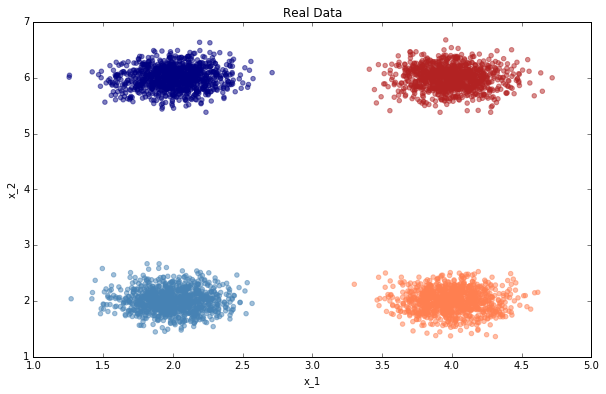

In [333]:
# Create data with 4 clusters
py_random.seed(316000)
np_random.seed(316000)

centers_x1 = [1, 2, 1, 2]
centers_x2 = [1, 1, 3, 3]
x_1 = []
x_2 = []
cluster = 1
colors = []
labels = []
for center_x1, center_x2 in zip(centers_x1, centers_x2):
    x_1.extend(center_x1 + np.random.normal(center_x1, 0.2, 1000))
    x_2.extend(center_x2 + np.random.normal(center_x2, 0.2, 1000))
    if cluster == 1:
        colors.extend(['steelblue'] * 1000)
        labels.extend([1] * 1000)
    elif cluster == 2:
        colors.extend(['coral'] * 1000)
        labels.extend([2] * 1000)
    elif cluster == 3:
        colors.extend(['navy'] * 1000)
        labels.extend([3] * 1000)
    else:
        colors.extend(['firebrick'] * 1000)
        labels.extend([4] * 1000)
    cluster += 1
x_1 = np.array(x_1)
x_2 = np.array(x_2)
labels = np.array(labels)

# Graph the original data
figure = plt.figure(figsize=(10,6))
axes = figure.add_subplot(1, 1, 1)
axes.scatter(x_1, x_2, alpha=0.5, color=colors)
axes.set_xlabel("x_1")
axes.set_ylabel("x_2")
axes.set_title("Real Data")

# 3 rounds of 10 fold cross validation
instances = np.column_stack((x_1.T, x_2.T, labels.T))
errors = []
for rd in xrange(10):
    generalization_error = []
    np.random.shuffle(instances)
    kf = KFold(1000, n_folds=10)
    for train, test in kf:
        # Learn kmeans model
        model = KMeans(n_clusters=4, init='random').fit(instances[train, :-1], instances[train, -1])
        predictions = model.predict(instances[test, :-1])
        # Calculate number of correct predictions
        error = sum(predictions == instances[test, -1]) / len(predictions)
        generalization_error.append(error)
    errors.append(np.mean(generalization_error))
print "Classification error via cross validation: %f%%" % (np.mean(errors) * 100)

Interestingly, choosing 4 random points to serve as the initial cluster centriods increased our performance by 4%.

For my last couple experiments, I'd like to examine what the Elbow method recommends our 'k' (the number of clusters) should be. Since we generated, knew the number of labels the original problem had, it was to our benefit to use that information to set 'k'. However, let's assume we didn't have the information. Will the elbow method return the result we expect in the case of both the sparse and dense data sets? Let's try it out. First, the sparse data set:

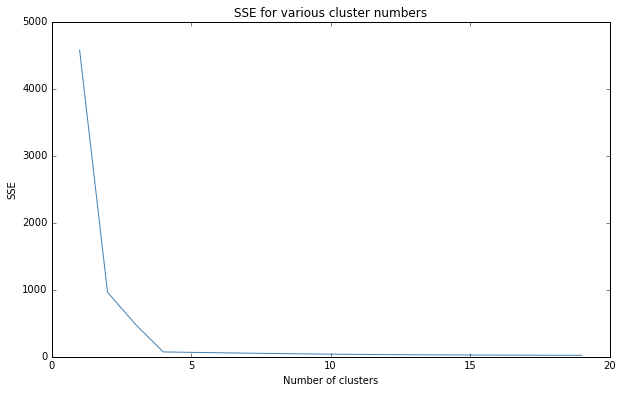

In [334]:
# Create data with 4 clusters
py_random.seed(316000)
np_random.seed(316000)
np.random.shuffle(instances)
colors = []

# Iterate over different values for the number of clusters
sse = []
for num_of_clusters in xrange(1, 20):
    model = KMeans(n_clusters=num_of_clusters).fit(instances[train, :-1], instances[train, -1])
    predictions = model.predict(instances[:, :-1])
    # Calculate the SSE of each point (sum of squared error = sum of difference(point, centroid)**2)
    sse.append(model.inertia_)
    
# Graph SSE
figure = plt.figure(figsize=(10,6))
axes = figure.add_subplot(1, 1, 1)
axes.plot([i for i in xrange(1, 20)], sse, color='steelblue')
axes.set_xlabel("Number of clusters")
axes.set_ylabel("SSE")
axes.set_title("SSE for various cluster numbers")

Using the elbow method, I claim this experiments the use of k=4, which is equal to the number of the classes we used to genereate the data. Now let's try the dense data:

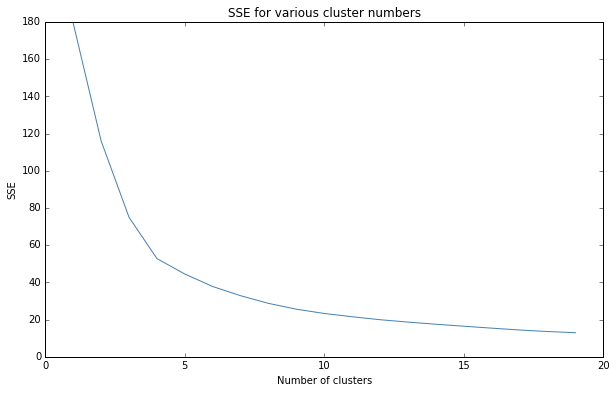

In [335]:
# Create data with 4 clusters
py_random.seed(317000)
np_random.seed(317000)
centers_x1 = [1, 1.25, 1, 1.25]
centers_x2 = [1, 1, 1.25, 1.25]
x_1 = []
x_2 = []
cluster = 1
colors = []
labels = []
for center_x1, center_x2 in zip(centers_x1, centers_x2):
    x_1.extend(center_x1 + np.random.normal(center_x1, 0.2, 1000))
    x_2.extend(center_x2 + np.random.normal(center_x2, 0.2, 1000))
    if cluster == 1:
        colors.extend(['steelblue'] * 1000)
        labels.extend([1] * 1000)
    elif cluster == 2:
        colors.extend(['coral'] * 1000)
        labels.extend([2] * 1000)
    elif cluster == 3:
        colors.extend(['navy'] * 1000)
        labels.extend([3] * 1000)
    else:
        colors.extend(['firebrick'] * 1000)
        labels.extend([4] * 1000)
    cluster += 1
x_1 = np.array(x_1)
x_2 = np.array(x_2)
labels = np.array(labels)
instances = np.column_stack((x_1.T, x_2.T, labels.T))
np.random.shuffle(instances)

# Iterate over different values for the number of clusters
sse = []
for num_of_clusters in xrange(1, 20):
    model = KMeans(n_clusters=num_of_clusters).fit(instances[train, :-1], instances[train, -1])
    predictions = model.predict(instances[:, :-1])
    # Calculate the SSE of each point (sum of squared error = sum of difference(point, centroid)**2)
    sse.append(model.inertia_)
    
# Graph SSE
figure = plt.figure(figsize=(10,6))
axes = figure.add_subplot(1, 1, 1)
axes.plot([i for i in xrange(1, 20)], sse, color='steelblue')
axes.set_xlabel("Number of clusters")
axes.set_ylabel("SSE")
axes.set_title("SSE for various cluster numbers")

Here, the elbow method also confirms that k=4 is best choice for this data. Both of these results make sense because we know the data was generated from 4 classes.